In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/Dataset100KForNERWords.csv', 
                    usecols=['sentença',
                             'Palavra', 
                             'Word2idx', 
                             'classOfWords']) # importando nosso
                                              # Dataset

In [3]:
pd.set_option('max_rows', 61)
data

,sentença,Palavra,Word2idx,classOfWords
0,0,Processo,16,0
1,0,0001543,45585,0
2,0,25,417,0
3,0,2013,59,0
4,0,8,15,0
...,...,...,...,...
16438900,99999,RACY,56353,0
16438901,99999,PARENTE,18254,0
16438902,99999,OAB,10,0
16438903,99999,234320,93263,0


In [4]:
data.iloc[0:61]

,sentença,Palavra,Word2idx,classOfWords
0,0,Processo,16,0
1,0,0001543,45585,0
2,0,25,417,0
3,0,2013,59,0
4,0,8,15,0
5,0,26,17,0
6,0,0344,2506,0
7,0,034,8342,0
8,0,42,538,0
9,0,0130,610,0


In [5]:
sentenças = data['sentença'].to_list()
Word2idx = data['Word2idx'].to_list()
classOfWords = data['classOfWords'].to_list()

In [6]:
# mudando as tags
# de = {'O': 0,   para = {'O': 1,     
#  'I-Cla': 1,            'I-Cla': 2,
#  'I-Seg': 2,            'I-Seg': 3,
#  'I-Jur': 3,            'I-Jur': 4,
#  'I-FiM': 4,            'I-FiM': 5,
#  'B-FiF': 5,            'B-FiF': 6,
#  'I-FiF': 6,            'I-FiF': 7,
#  'B-Jur': 7,            'B-Jur': 8,
#  'B-FiM': 8,            'B-FiM': 9,
#  'I-Gov': 9,            'I-Gov': 10,
#   'I-Ass': 10,          'I-Ass': 11,
#   'B-Gov': 11,          'B-Gov': 12,
#   'B-Ass': 12,          'B-Ass': 13,
#   'B-Cla': 13,          'B-Cla': 14,
#   'B-Seg': 14,          'B-Seg': 15,
#   'B-Val': 15,          'B-Val': 16,
#   'I-Val': 16}          'I-Val': 17}

new_classOfWords = []
for y in classOfWords:
    new_classOfWords.append(y+1)
len(new_classOfWords), len(classOfWords)

(16438905, 16438905)

In [7]:
# construindo as sentenças

i = 0
X_seq = []
Y_seq = []
unique, inicio = np.unique(sentenças,return_index=True)

for i,ind in enumerate(inicio):

    if (i != 87918):
        X_seq.append(Word2idx[ind:inicio[i+1]])
        Y_seq.append(new_classOfWords[ind:inicio[i+1]])
    else:
        X_seq.append(Word2idx[ind:])
        Y_seq.append(new_classOfWords[ind:])


In [8]:
maxs = [np.max(seq) for seq in X_seq]
np.max(maxs)

366549

In [9]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [10]:
max_len = 150
y = pad_sequences(maxlen=max_len, sequences=Y_seq, padding="post",truncating='post') # aplicando padding nas classes

In [11]:
X = pad_sequences(maxlen=max_len, sequences=X_seq, padding="post",truncating='post') # aplicando padding nas sentenças

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.1, shuffle=True, random_state=123)

In [14]:
tag2idx = {'O': 1,     
           'I-Cla': 2,
           'I-Seg': 3,
           'I-Jur': 4,
           'I-FiM': 5,
           'B-FiF': 6,
           'I-FiF': 7,
           'B-Jur': 8,
           'B-FiM': 9,
           'I-Gov': 10,
           'I-Ass': 11,
           'B-Gov': 12,
           'B-Ass': 13,
           'B-Cla': 14,
           'B-Seg': 15,
           'B-Val': 16,
           'I-Val': 17} # dicionário de tags [apenas para labels]

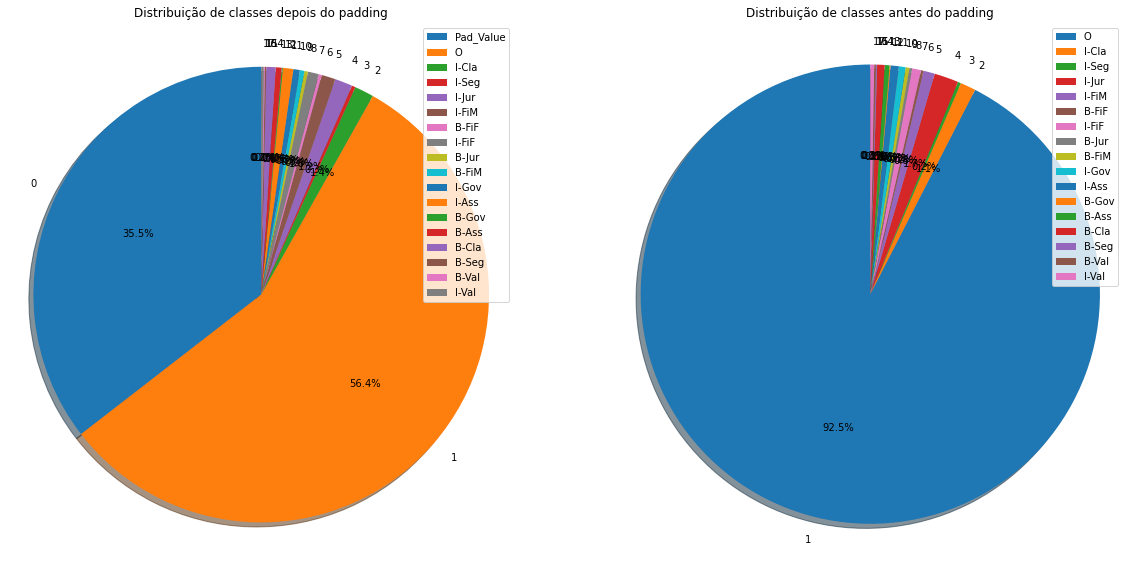

In [15]:
concate_Y_seq= np.asarray([element for y_seq in y_tr for element in y_seq])
labels,sizes = np.unique(concate_Y_seq, return_counts=True)

lab = list(tag2idx.keys())
lab.insert(0, 'Pad_Value')
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 10))
ax1.pie(sizes,labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.legend(lab)
ax1.set_title('Distribuição de classes depois do padding')

concate_Y_seq= np.asarray([element for y_seq in Y_seq for element in y_seq])
labels,sizes = np.unique(concate_Y_seq, return_counts=True)
ax2.pie(sizes,labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax2.legend(list(tag2idx.keys()))
ax2.set_title('Distribuição de classes antes do padding')

plt.show()

In [16]:
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras import Input
from tensorflow.keras.layers import LSTM, Embedding, Dense, TimeDistributed, SpatialDropout1D, Bidirectional, Input, Masking

tf.__version__, tf.executing_eagerly()

('2.3.0', True)

In [17]:
units = 512 # output da LSTM
Emb_dims = 50 # tamanho do vetor de embeddings
Spa_dropout = 0.5 # spacial dropout rate
n_tags = 18 # quantidade de tags

model = Sequential()
model.add(Input(shape=(None,)))
model.add(Embedding(input_dim=np.max(maxs) + 1, output_dim=Emb_dims, mask_zero=True))
model.add(SpatialDropout1D(Spa_dropout))
model.add(Bidirectional(LSTM(units=units, return_sequences=True), merge_mode='sum'))
model.add(Dense(n_tags, activation="softmax"))

In [18]:
### definindo metricas customizadas

def recall(y_true, y_pred):
    y_pred = tf.cast(K.argmax(y_pred), tf.float32) # transformando o vetor de (None, 150, n_tags) para (None, 150)
    macro_recall = 0
    y_pred = y_pred[y_true != 0] # retira zero
    y_true = y_true[y_true != 0] # retira zero
    equals = y_pred[K.equal(y_true,y_pred)]  # calcula os verdadeiros positivos, ignorando o zero
    
    for i in range(1,n_tags):
        equals_positives = equals[equals == i]  
        true_positives = K.sum(equals_positives/i) # divide por i, para que os valores se tornem 1

        equals_possibles = y_true[K.equal(y_true,K.constant(i))]/i
        possible_positives = K.sum(equals_possibles)

        recall = true_positives / (possible_positives + K.epsilon())
        macro_recall = macro_recall + recall

    macro_recall = macro_recall/(n_tags-1)  

    return macro_recall

def precision(y_true, y_pred):
    y_pred = tf.cast(K.argmax(y_pred), tf.float32) # trannsformando o vetor de (None, 150, n_tags) para (None, 150)
    macro_precision = 0
    y_pred = y_pred[y_true != 0] # retira zero
    y_true = y_true[y_true != 0] # retira zero
    equals = y_true[K.equal(y_true,y_pred)]  # calcula os verdadeiros positivos, ignorando o zero
    
    for i in range(1,n_tags):
        equals_positives = equals[equals == i]  
        true_positives = K.sum(equals_positives/i) # divide por i, para que os valores se tornem 1

        equals_pred_possibles = y_pred[K.equal(y_pred,K.constant(i))]/i
        predicted_positives = K.sum(equals_pred_possibles)

        precision = true_positives / (predicted_positives + K.epsilon())
        macro_precision = macro_precision + precision

    macro_precision = macro_precision/(n_tags-1)

    return macro_precision

def macro_f1(y_true, y_pred):
    prec = precision(y_true, y_pred)
    rec = recall(y_true, y_pred)
    return 2*((prec*rec)/(prec+rec+K.epsilon()))

In [19]:
model.compile(optimizer="Adam",
              loss="sparse_categorical_crossentropy",
              metrics=["SparseCategoricalAccuracy",
              recall,
              precision,
              macro_f1])

In [20]:
import time

start = time.time()
bs = 128
model.fit(X_tr,y_tr,
          validation_data=(X_te, y_te),
          epochs = 10,
          batch_size = bs)

print('O modelo levou {} s durante o treino.'.format(time.time()-start))

Epoch 1/10
619/619 [==============================] - 260s 420ms/step - loss: 0.1810 - sparse_categorical_accuracy: 0.9252 - recall: 0.4412 - precision: 0.5388 - macro_f1: 0.4837 - val_loss: 0.0841 - val_sparse_categorical_accuracy: 0.9599 - val_recall: 0.7456 - val_precision: 0.8321 - val_macro_f1: 0.7863
Epoch 2/10
619/619 [==============================] - 254s 410ms/step - loss: 0.0696 - sparse_categorical_accuracy: 0.9671 - recall: 0.7994 - precision: 0.8572 - macro_f1: 0.8268 - val_loss: 0.0602 - val_sparse_categorical_accuracy: 0.9717 - val_recall: 0.8602 - val_precision: 0.8662 - val_macro_f1: 0.8630
Epoch 3/10
619/619 [==============================] - 255s 412ms/step - loss: 0.0505 - sparse_categorical_accuracy: 0.9759 - recall: 0.8631 - precision: 0.8935 - macro_f1: 0.8777 - val_loss: 0.0543 - val_sparse_categorical_accuracy: 0.9737 - val_recall: 0.8827 - val_precision: 0.8695 - val_macro_f1: 0.8759
Epoch 4/10
619/619 [==============================] - 253s 409ms/step - loss

In [21]:
name = 'Models/UseForPreprocessing_Max_len{}_Emb{}_SDrop1D{}_Bid{}_Den{}_bs{}_NoPadding_valuestags+1.h5'.format(max_len, Emb_dims, Spa_dropout, units, n_tags, bs)
model.save(name)

In [22]:
# função que plota gráficos do keras
# recebe um dicionário do history do model e um string de nome da métrica
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+metric], '')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])
    plt.show()

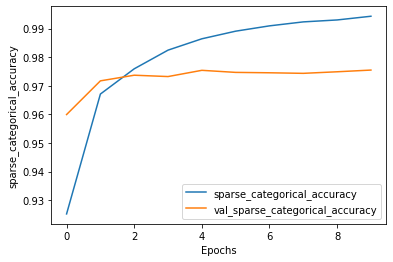

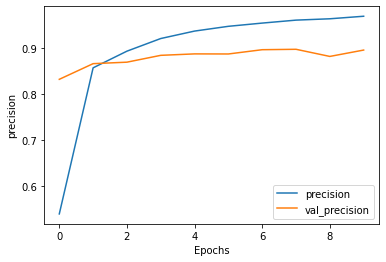

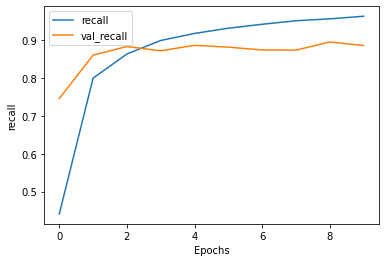

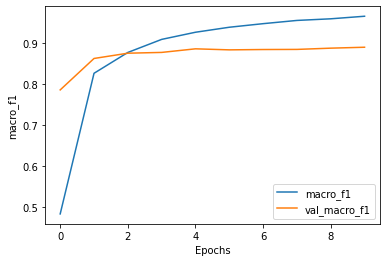

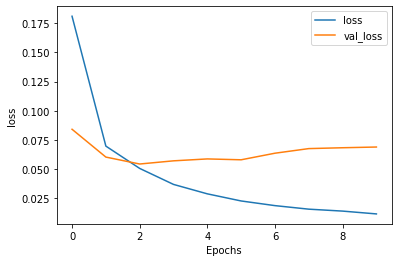

In [23]:
plot_graphs(model.history, 'sparse_categorical_accuracy')
plot_graphs(model.history, 'precision')
plot_graphs(model.history, 'recall')
plot_graphs(model.history, 'macro_f1')
plot_graphs(model.history, 'loss')

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

In [25]:
y_pred = []

pred = model.predict(X_te, batch_size=128) # fazendo a predição para as amostras de teste

for p in pred: # apenas transofrmando-as em um grande vetor de predições
    for word in p:
        y_pred.append(np.argmax(word))

In [26]:
y_pred = np.array(y_pred) # transformando em array
y_true = np.array([tag for word in y_te for tag in word]) # deixando uni dimensiona o vetor de classes verdadeiros

y_pred = y_pred[y_true != 0] # retirando do pred aquelas posições de padding
y_true = y_true[y_true != 0] # mesmo para as classes reais

conf_mat = confusion_matrix(y_true, np.array(y_pred)) # calculando a matriz de confusão

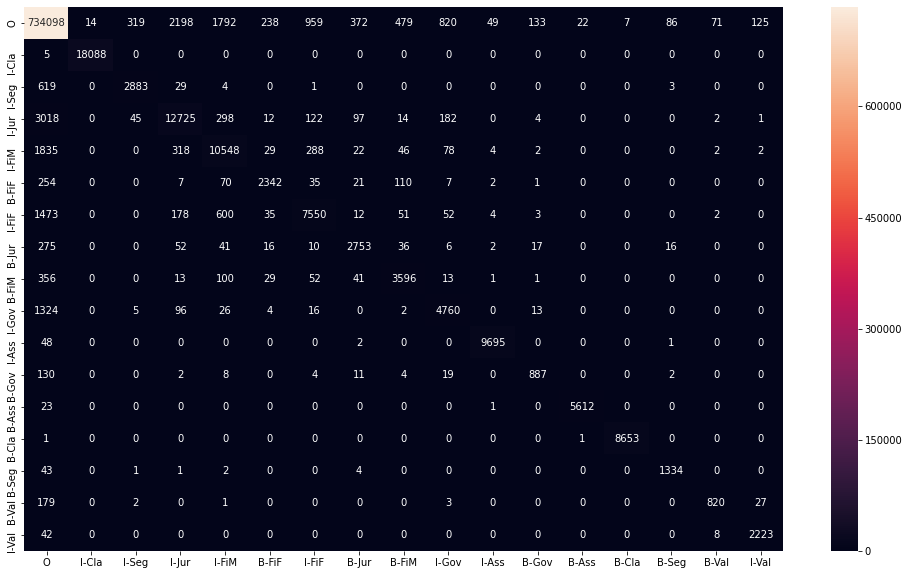

In [27]:
class_names = list(tag2idx.keys())
fig = plt.figure(figsize=(17,10))
df_cm = pd.DataFrame(conf_mat, index=class_names, columns=class_names)
heatmap = sns.heatmap(df_cm, annot=True, fmt='d')
heatmap

In [28]:
scores = classification_report(y_true, 
y_pred, target_names=class_names)
print(scores) 

precision    recall  f1-score   support

           O       0.99      0.99      0.99    741782
       I-Cla       1.00      1.00      1.00     18093
       I-Seg       0.89      0.81      0.85      3539
       I-Jur       0.81      0.77      0.79     16520
       I-FiM       0.78      0.80      0.79     13174
       B-FiF       0.87      0.82      0.84      2849
       I-FiF       0.84      0.76      0.79      9960
       B-Jur       0.83      0.85      0.84      3224
       B-FiM       0.83      0.86      0.84      4202
       I-Gov       0.80      0.76      0.78      6246
       I-Ass       0.99      0.99      0.99      9746
       B-Gov       0.84      0.83      0.83      1067
       B-Ass       1.00      1.00      1.00      5636
       B-Cla       1.00      1.00      1.00      8655
       B-Seg       0.93      0.96      0.94      1385
       B-Val       0.91      0.79      0.85      1032
       I-Val       0.93      0.98      0.96      2273

    accuracy                           0